In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

#  1) Load the data file using pandas. 

In [2]:
dataapp=pd.read_csv("googleplaystore.csv")

In [3]:
dataapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 2) Check for null values in the data. Get the number of null values for each column.

In [4]:
dataapp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3)Drop records with nulls in any of the columns

In [5]:
dataapp.dropna(inplace=True)

In [6]:
dataapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
dataapp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4) Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [8]:
dataapp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
dataapp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
dataapp.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [11]:
dataapp["Size"] = [float(i.split('M')[0]) if 'M' in i else float(0) for i in dataapp["Size"]]

In [12]:
dataapp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
dataapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [14]:
dataapp["Size"]=dataapp["Size"]*1000

In [15]:
dataapp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
dataapp.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        0.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [17]:
dataapp["Reviews"]=dataapp["Reviews"].astype(int)

In [18]:
dataapp.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

In [19]:
dataapp["Installs"]=[float(i.replace('+','').replace(',','')) if '+' in i or ',' in i else float(0) for i in dataapp["Installs"]]

In [20]:
dataapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.2+ KB


In [21]:
dataapp["Installs"]=dataapp["Installs"].astype(int)

In [22]:
dataapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 950.6+ KB


In [23]:
dataapp["Price"]=[float(i.replace("$","")) if "$" in i else float(0) for i in dataapp["Price"]]

In [24]:
dataapp["Price"]=dataapp["Price"].astype(int)

# 5) Sanity checks:

5.1) Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

5.2 )Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

5.3)For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [25]:
dataapp.shape

(9360, 13)

In [26]:
dataapp.drop(dataapp[(dataapp["Reviews"]<1) & (dataapp["Reviews"]>5)].index,inplace=True)

In [27]:
dataapp.shape

(9360, 13)

In [28]:
dataapp.drop(dataapp[dataapp["Reviews"] > dataapp["Installs"]].index, inplace=True)

In [29]:
dataapp.shape

(9353, 13)

In [30]:
dataapp.drop(dataapp[(dataapp["Type"]=="Free") & (dataapp["Price"]>0)].index, inplace=True)

In [31]:
dataapp.shape

(9353, 13)

# 5). Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

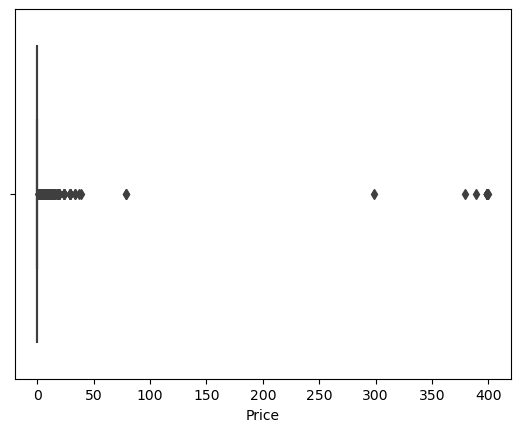

In [32]:
sns.boxplot(dataapp["Price"])

#From the above boxplot, 60 and above prices are Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

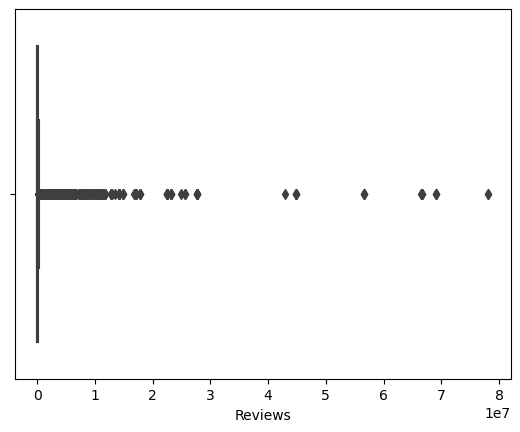

In [33]:
sns.boxplot(dataapp["Reviews"])

<AxesSubplot:xlabel='Rating', ylabel='Count'>

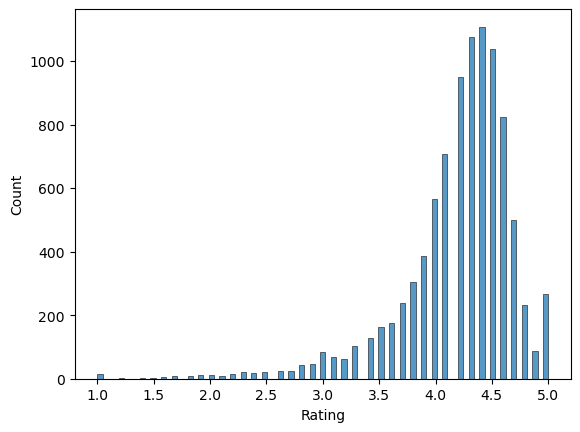

In [34]:
sns.histplot(dataapp["Rating"])

#some apps are havinb higher rating between 4 and 5

<AxesSubplot:xlabel='Size', ylabel='Count'>

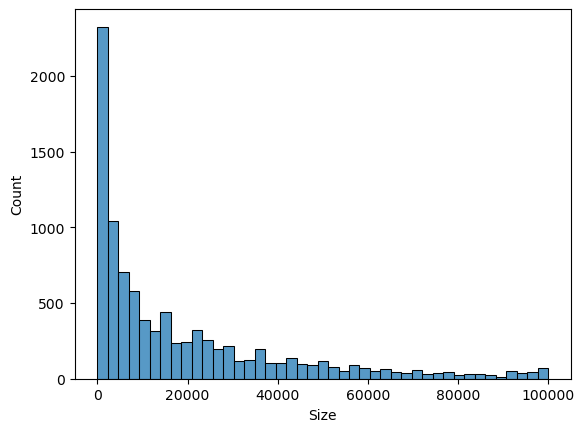

In [35]:
sns.histplot(dataapp["Size"])

In [36]:
#most apps are having less size

In [37]:
dataapp.shape

(9353, 13)

# 6) Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [38]:
dataapp.drop(dataapp[dataapp["Price"]> 200].index, inplace=True)

In [39]:
dataapp.shape

(9338, 13)

In [40]:
dataapp.drop(dataapp[dataapp['Reviews'] > 2000000].index, inplace = True)

In [41]:
dataapp.shape

(8885, 13)

In [42]:
dataapp.quantile([.1, .25, .5, .70, .90, .95, .99], axis = 0) 

,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,0.0,1000.0,0.0
0.25,4.0,159.00,2600.0,10000.0,0.0
0.50,4.3,4290.00,9500.0,500000.0,0.0
0.70,4.5,35930.40,23000.0,1000000.0,0.0
0.90,4.7,296771.00,50000.0,10000000.0,0.0
0.95,4.8,637298.00,68000.0,10000000.0,1.0
0.99,5.0,1462800.88,95000.0,100000000.0,7.0


#dropping more than 10000000 Install value

In [43]:
dataapp.drop(dataapp[dataapp['Installs'] > 10000000].index, inplace = True)

In [44]:
dataapp.shape

(8496, 13)

# 7). Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

1) Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

2) Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

3) Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

4) Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

5) Make boxplot for Ratings vs. Category

Which genre has the best ratings?

<AxesSubplot:xlabel='Rating', ylabel='Price'>

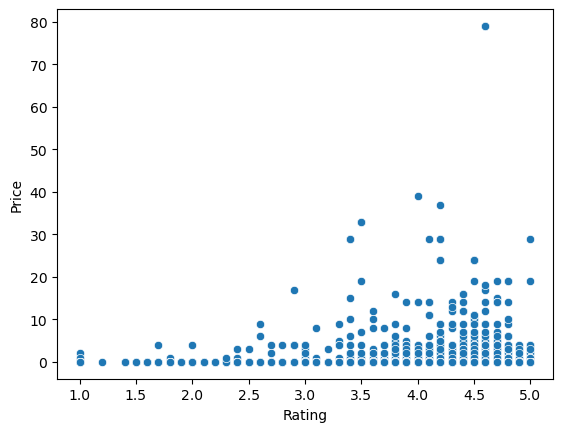

In [45]:
sns.scatterplot(x='Rating', y='Price',data=dataapp)

#analysis shows that rating has some effect with price 

<AxesSubplot:xlabel='Rating', ylabel='Size'>

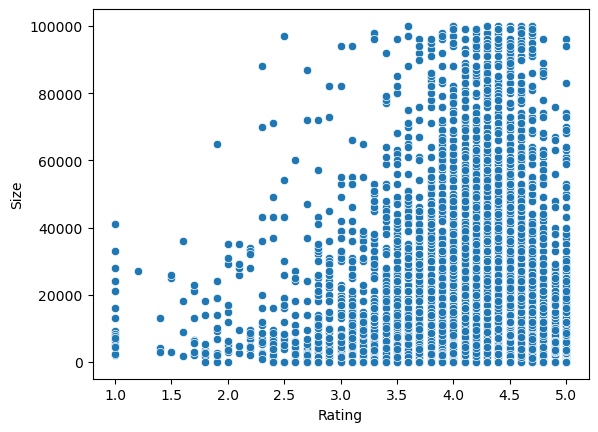

In [46]:
sns.scatterplot(x='Rating',y='Size',data=dataapp)

#analysis shows that as rating increases with increase in size

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

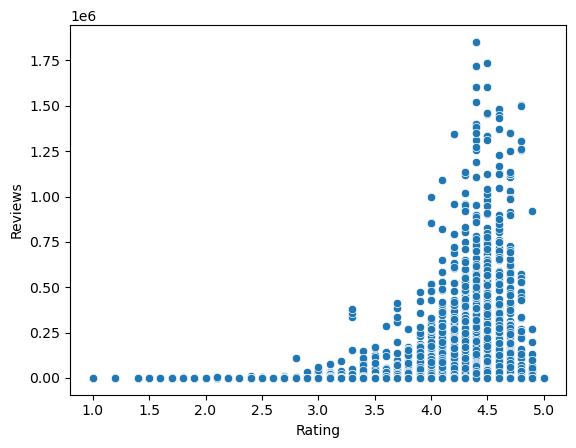

In [47]:
sns.scatterplot(x='Rating',y='Reviews',data=dataapp)

In [48]:
#analysis shows rating increases with increase in reviews..

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

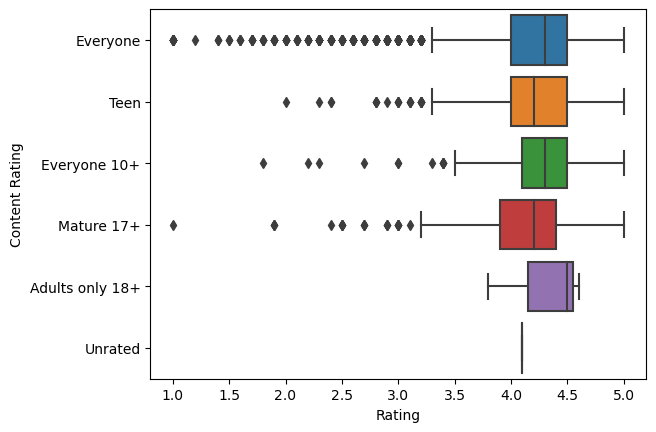

In [49]:
sns.boxplot(x="Rating", y="Content Rating", data=dataapp)

#Those apps which are categorised in content rating for everyone have more bad ratings compare to other sections because of number of oulier count, while 18+ apps have better ratings as they don't have any outlier.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

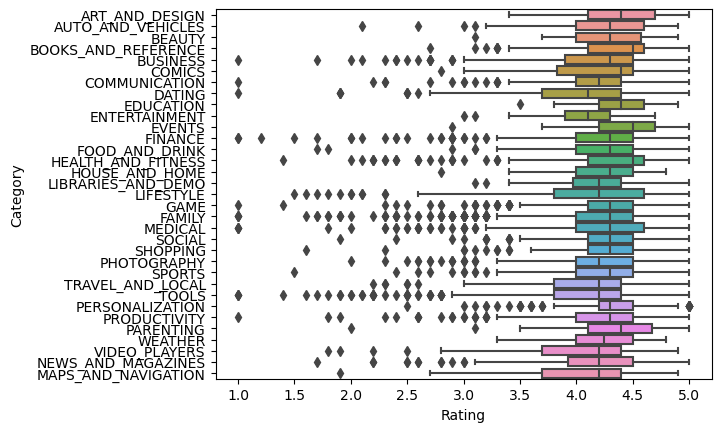

In [50]:
sns.boxplot(x="Rating", y="Category", data=dataapp)

#event has more rating as it contain less outliers.

# 8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

1) Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

2) Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

3) Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [51]:
inp1 = dataapp

In [52]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


#Reviews and Installs column still have some relatively high values, before building the linear regression model we need to reduce the skew will do log transformation for columns.

In [53]:
inp1.skew()

C:\Users\91918\AppData\Local\Temp\ipykernel_45416\3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.749753
Reviews      4.576494
Size         1.655917
Installs     1.543697
Price       18.074542
dtype: float64

In [54]:
#) apply log transformation to Reviews
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [55]:
reviewskew.skew()

-0.20039949659264134

In [56]:
#) apply log transformation to Installs
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] 

0           10000
1          500000
2         5000000
4          100000
5           50000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8496, dtype: int32

In [57]:
installsskew.skew()

-0.5097286542754812

In [58]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [59]:
#Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1, inplace = True)

In [60]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design


In [61]:
inp1.shape

(8496, 8)

In [62]:
# create a copy of dataframe
inp2 = inp1

In [63]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design


In [64]:
#get unique values in column category
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [65]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#get unique values in Column Genres
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

#There are too many categories under Genres. Hence, we will try to reduce some categories which have very few samples under them and put them under one new common category i.e. "Other"

In [67]:
#Create an empty list
lists = []
# We need to reduce some categories that dont have any impact on making model
#Get the total genres count and genres count less than 20 append those into the list
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the genres which are in the list to other
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [68]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [69]:
#Storing the genres column into x varible and delete the genres col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [70]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,10000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
inp2.shape

(8496, 91)

In [72]:
#getting the unique values
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [73]:
#Applying one hot encoding 
#Storing the Content Rating column into x varible and delete the Content Rating col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
inp2.shape

(8496, 96)

# 9) Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
# 10)Separate the dataframes into X_train, y_train, X_test, and y_test.

In [75]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [76]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature 
df2 = inp2
X = df2.drop('Rating',axis=1)
y = df2['Rating']

#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

# 11. Model building Use linear regression as the technique Report the R2 on the train set

In [77]:
#Create a linear reggression obj by calling the linear reggressor algorithm
lin_reggressor = LinearRegression()
lin_reggressor.fit(X_train,y_train)

LinearRegression()

In [78]:
R2_Score_train_data = round(lin_reggressor.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_train_data))

The R2 value of the Training Set is : 0.074


In [79]:
# test the output by changing values, like 3750
y_pred = lin_reggressor.predict(X_test)
R2_Score_test_data =metrics.r2_score(y_test,y_pred)
R2_Score_test_data

0.06257564620467992

# 12. Make predictions on test set and report R2.

In [80]:
R2_Score_test_data = round(lin_reggressor.score(X_test,y_test),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_test_data))

The R2 value of the Training Set is : 0.063
